In [ ]:
!pip install rasterio -q

In [ ]:
import rasterio as rio
from rasterio.plot import show
import numpy as np
from rasterio.mask import mask
from matplotlib.colors import ListedColormap
#from matplotlib_scalebar.scalebar import ScaleBar
from rasterio.plot import plotting_extent

import os

import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
values_list = [0, 1, 2, 3, 4, 5]
colors_list = ['white','#006400', '#aa0000', '#FFFFB2', '#0000FF', '#e993fa']
cmap = ListedColormap(colors_list, name='custom_cmap', N=len(colors_list))

In [ ]:
img1993 = rio.open('/content/drive/MyDrive/selper_pousoAlegre/LULC_pousoAlegre_1993.tif').read()
img2004 = rio.open('/content/drive/MyDrive/selper_pousoAlegre/LULC_pousoAlegre_2004_sampleNovoBomBom.tif').read()

In [ ]:
def plotSideBySide(num_x, num_y, imagens, title):
    fig, axs = plt.subplots(num_x, num_y, figsize = (10,10))

    for i, ax in enumerate(axs.flat):
                ax.imshow(np.squeeze(imagens[i]), cmap = cmap)
                ax.set_title(title[i])
                ax.axis('off')

    plt.tight_layout()
    plt.show()

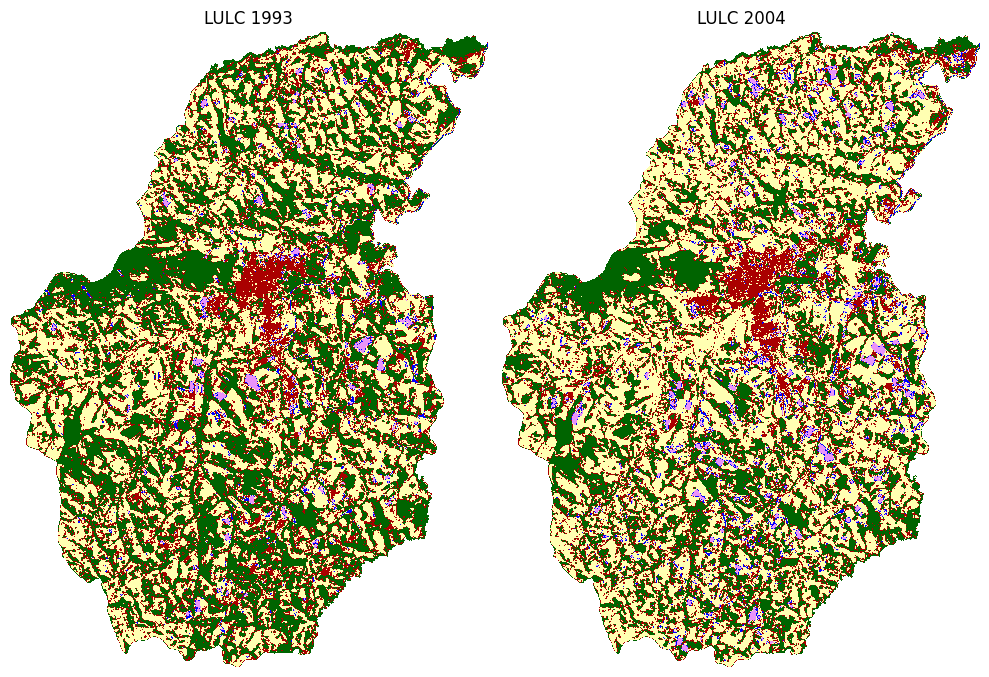

In [ ]:
plotSideBySide(1, 2, [img1993, img2004], ['LULC 1993', 'LULC 2004'])

In [ ]:
def calcArea(img):
  img = img[0]
  forest_area = 0
  urban_area = 0
  pasture_area = 0
  water_area = 0
  soil_area = 0

  #30m x 30m = 0,003 km * 0,003 km
  pixel_area = (30/1000)**2

  for linha in img:
    for elemento in linha:
      if elemento == 1:
        forest_area += pixel_area

      elif elemento == 2:
        urban_area += pixel_area

      elif elemento == 3:
        pasture_area += pixel_area

      elif elemento == 4:
        water_area += pixel_area

      elif elemento == 5:
        soil_area += pixel_area

  return ({'forest': forest_area, 'urban': urban_area, 'pasture': pasture_area, 'water': water_area, 'soil': soil_area})


In [ ]:
dados = pd.DataFrame(columns = ['img1993', 'img2004'])

In [ ]:
dados['img1993'] = calcArea(img1993)
dados['img2004'] = calcArea(img2004)

In [ ]:
dados['dif'] = dados['img2004'] - dados['img1993']
dados['dif_pp'] = (( dados['img2004']/dados['img1993'] ) -1)*100

In [ ]:
dados

,img1993,img2004,dif,dif_pp
forest,242.3295,186.9732,-55.3563,-22.843401
urban,36.7173,46.9134,10.1961,27.769199
pasture,248.2272,285.4098,37.1826,14.979261
water,8.7885,8.0334,-0.7551,-8.591910
soil,8.8308,17.5626,8.7318,98.878924
